In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


df = pd.read_csv("/Users/anchanghun/Downloads/AI_Study/dataset/diabetes.csv", index_col=0)

In [3]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [4]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

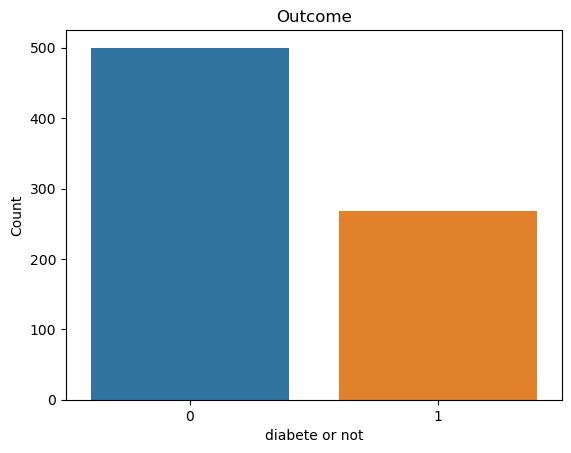

In [5]:
import matplotlib.pyplot as plt
sns.countplot(data = df, x="Outcome")
plt.xlabel("diabete or not")
plt.ylabel("Count")
plt.title("Outcome")


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/Users/anchanghun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


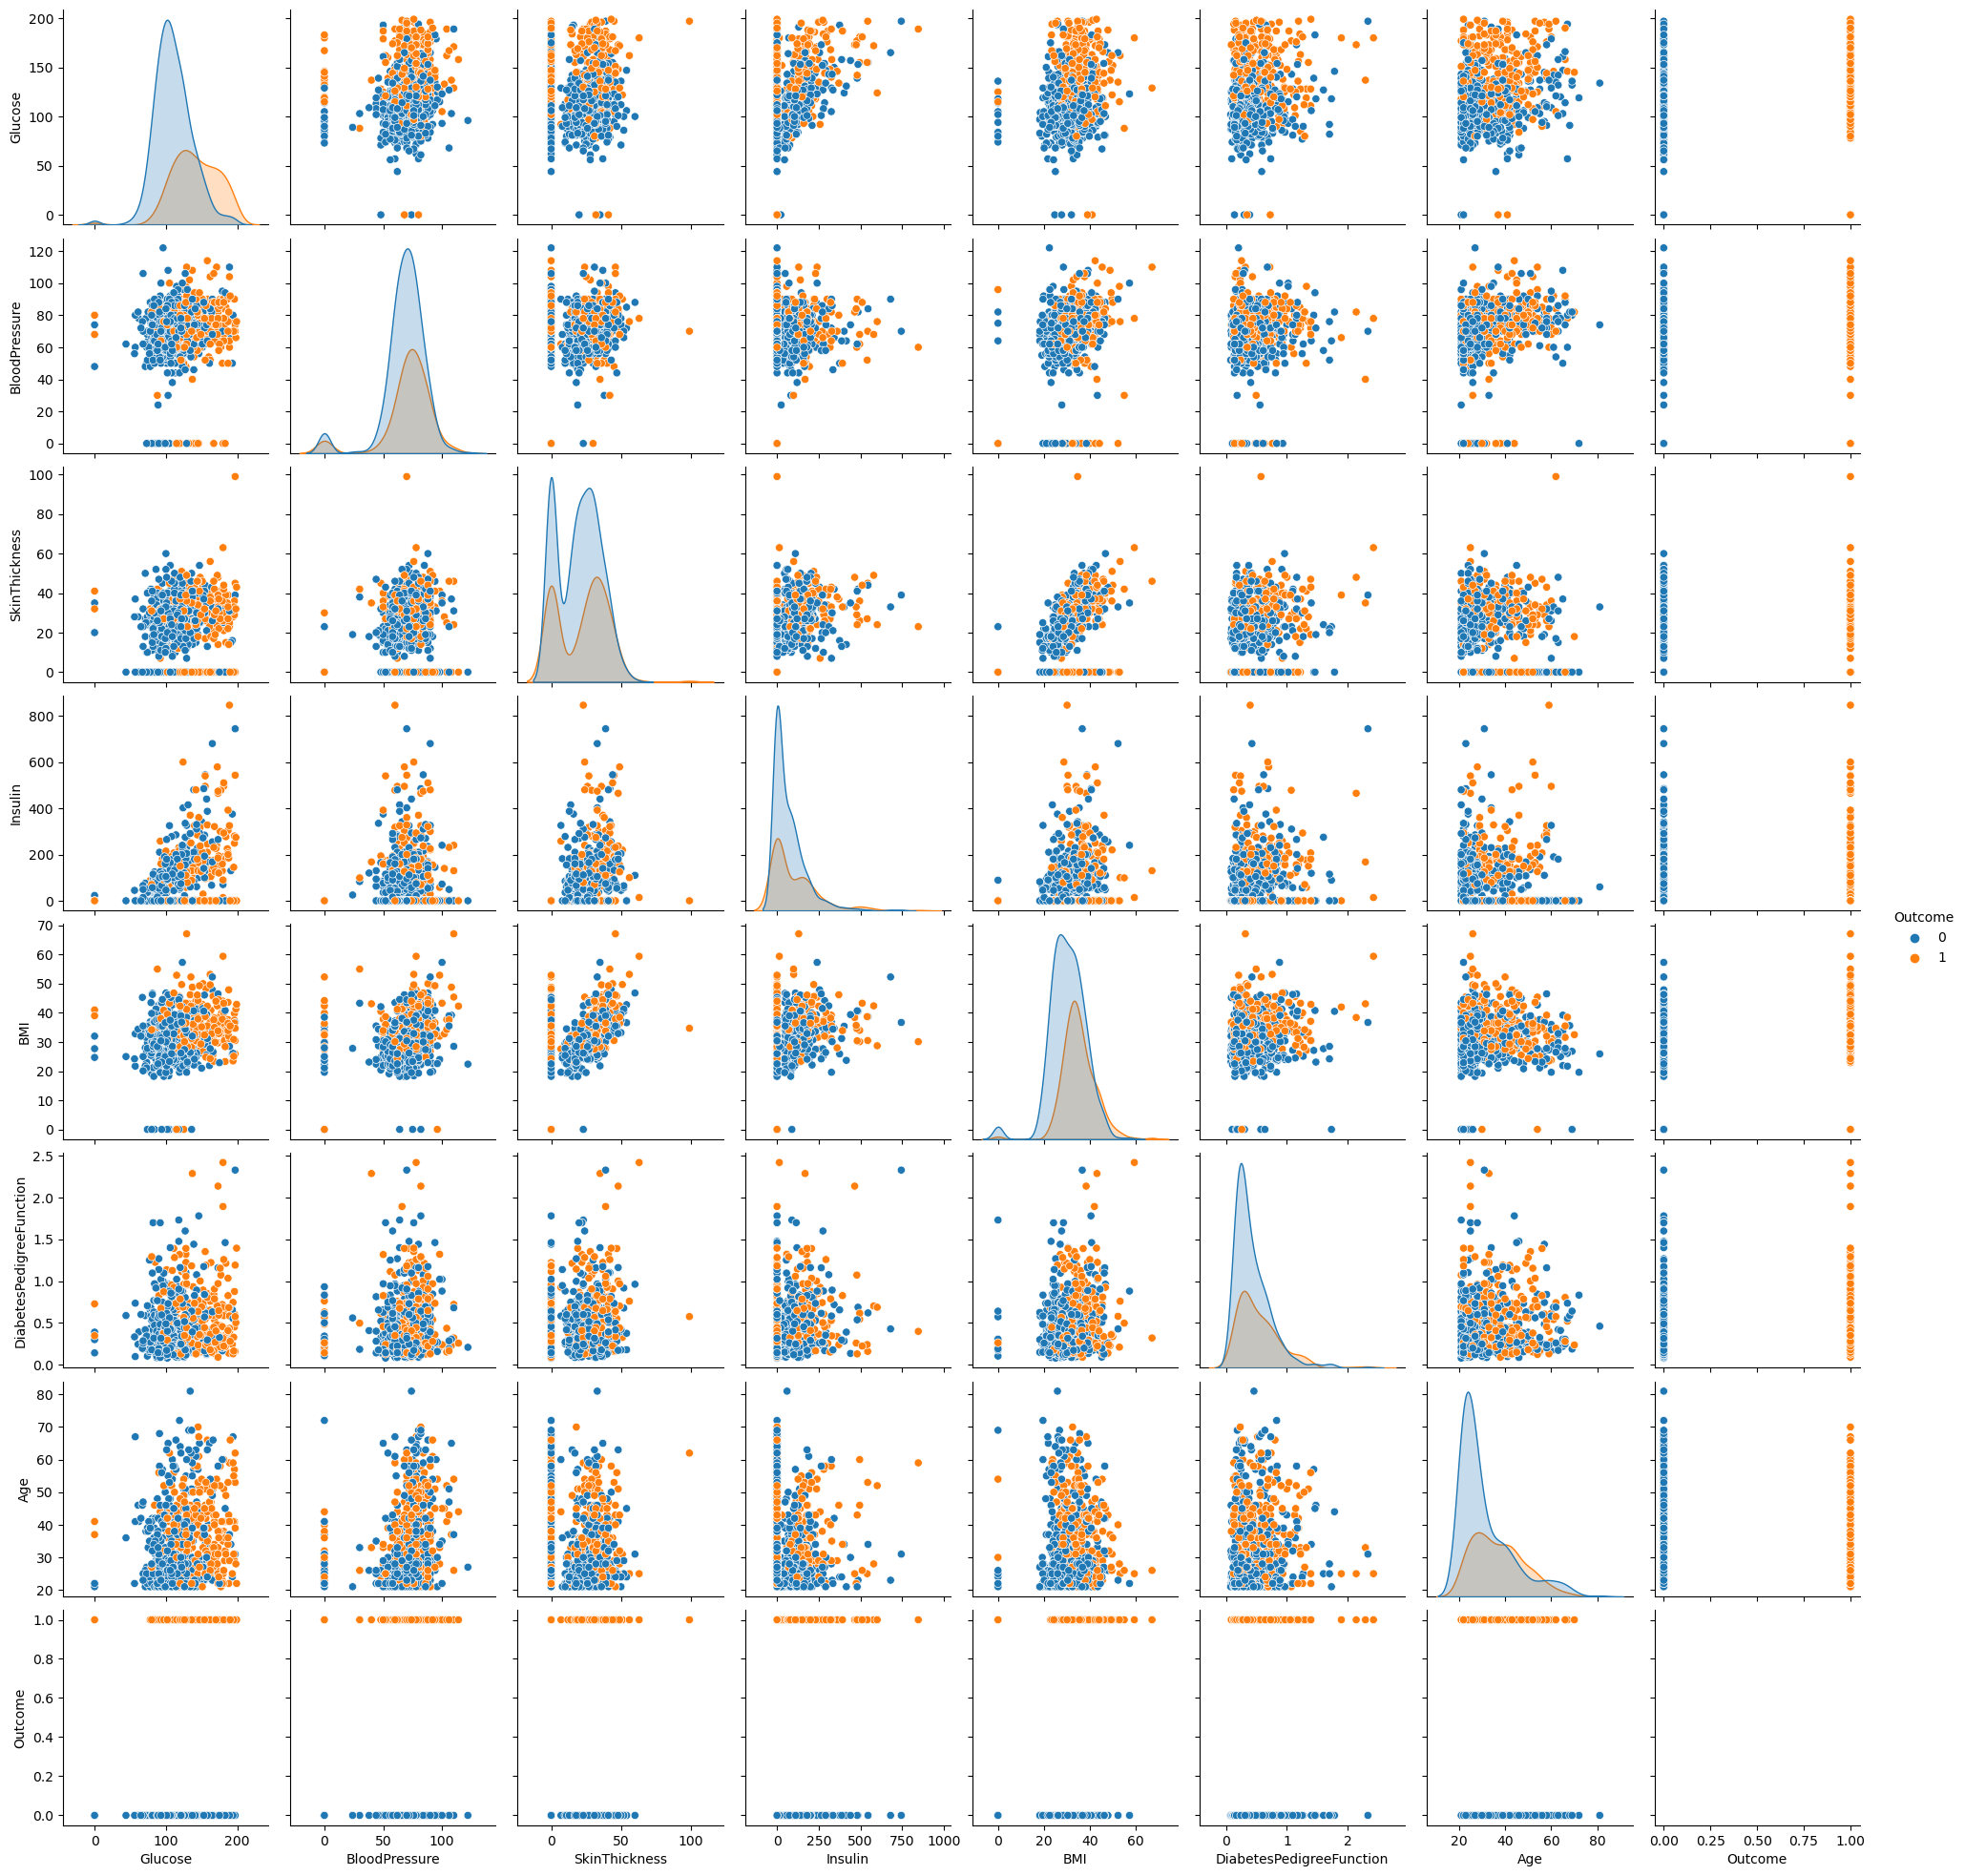

In [8]:
sns.pairplot(df,
             vars=df.columns,
            hue ='Outcome')
plt.show()

In [9]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [11]:
y=df['Outcome']

In [12]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [13]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [15]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(687, 5, 7) (687,)
(73, 5, 7) (73,)


In [17]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values
print(y_train_onehot.shape)
print(y_train[3])
print(y_train_onehot)

(687, 2)
1.0
[[ True False]
 [ True False]
 [ True False]
 ...
 [ True False]
 [False  True]
 [False  True]]


In [18]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [19]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], 2

In [20]:
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, LeakyReLU, LSTM

input_layer = Input(shape=(n_timesteps,n_features))
lstm_layer = LSTM(32)(input_layer)

dens = Dense(16, activation="tanh")(lstm_layer)

outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 7)]            0         
                                                                 
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 5682 (22.20 KB)
Trainable params: 5682 (22.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
train_epochs = 100
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6486 - accuracy: 0.6537 - val_loss: 0.5791 - val_accuracy: 0.7101
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6472 - val_loss: 0.5728 - val_accuracy: 0.7101
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.6489 - val_loss: 0.5673 - val_accuracy: 0.7101
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.6505 - val_loss: 0.5756 - val_accuracy: 0.7101
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.6570 - val_loss: 0.5611 - val_accuracy: 0.7101
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.6586 - val_loss: 0.5658 - val_accuracy: 0.7246
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6748 - val_loss: 0.5643 - val_accuracy: 0.7246
Epoch 8/100
2

Epoch 59/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8398 - val_loss: 0.6083 - val_accuracy: 0.6957
Epoch 60/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8107 - val_loss: 0.6093 - val_accuracy: 0.6957
Epoch 61/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8463 - val_loss: 0.5617 - val_accuracy: 0.6812
Epoch 62/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8430 - val_loss: 0.5911 - val_accuracy: 0.7246
Epoch 63/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8430 - val_loss: 0.5633 - val_accuracy: 0.7101
Epoch 64/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8447 - val_loss: 0.6035 - val_accuracy: 0.6667
Epoch 65/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8511 - val_loss: 0.5611 - val_accuracy: 0.7391
Epoch 

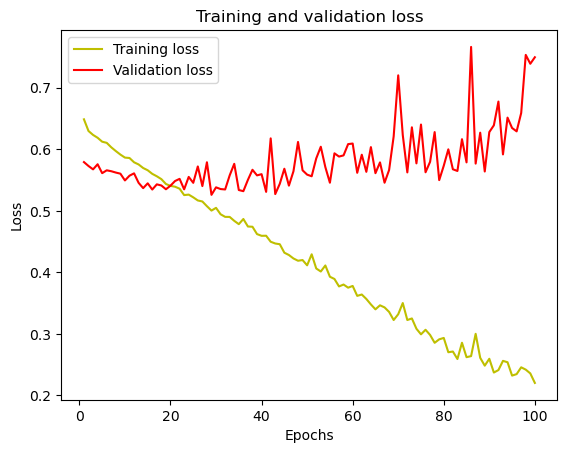

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

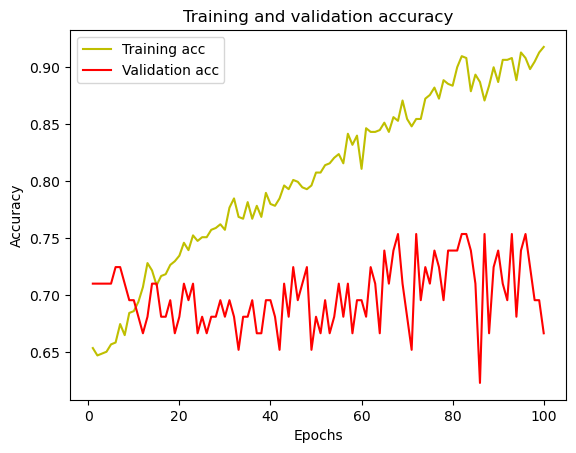

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

3/3 [==============================] - 0s 960us/step


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        45
           1       0.71      0.54      0.61        28

    accuracy                           0.74        73
   macro avg       0.73      0.70      0.71        73
weighted avg       0.74      0.74      0.73        73

[[39  6]
 [13 15]]
